In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!pip install imutils

In [3]:
from tensorflow.keras.applications.mobilenet_v2 import preprocess_input
from tensorflow.keras.preprocessing.image import img_to_array
from tensorflow.keras.models import load_model
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import cv2
import os

In [4]:
# from os.path import dirname, join,__file__
prototxtPath = '/content/drive/MyDrive/Facemask_Detection/deploy.prototxt.txt'
weightsPath= '/content/drive/MyDrive/Facemask_Detection/res10_300x300_ssd_iter_140000.caffemodel'

In [5]:
prototxtPath

'/content/drive/MyDrive/Facemask_Detection/deploy.prototxt.txt'

In [6]:
net=cv2.dnn.readNet(weightsPath,prototxtPath)

In [7]:
net

< cv2.dnn.Net 0x7fb0911e0ad0>

In [8]:
## Load model
model=load_model(r'/content/drive/MyDrive/Colab Notebooks/garvita.h5')

In [9]:
dataset = "test"
imagePaths=list(paths.list_images(dataset))
data=[]

for i in imagePaths:
    data.append(i)


In [10]:
# image=cv2.imread("/content/drive/MyDrive/group-wth-mask.jpg")

In [18]:
image=cv2.imread("/content/drive/MyDrive/lady2-with-mask.jpg")

In [19]:
image.shape

(630, 1200, 3)

In [20]:
(h,w)=image.shape[:2]

In [21]:
blob=cv2.dnn.blobFromImage(image,1.0,(300,300),(104.0,177.0,123.0))
blob.shape
net.setInput(blob)
detections = net.forward()

In [22]:
detections

array([[[[0.        , 1.        , 0.9897682 , ..., 0.26016822,
          0.63352555, 0.6043743 ],
         [0.        , 1.        , 0.13255471, ..., 3.9986198 ,
          4.83591   , 4.985488  ],
         [0.        , 1.        , 0.12568331, ..., 3.998577  ,
          0.83814085, 4.983451  ],
         ...,
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ],
         [0.        , 0.        , 0.        , ..., 0.        ,
          0.        , 0.        ]]]], dtype=float32)

In [23]:
det =[]
a=0
for i in range(0,detections.shape[2]):
    confidence=detections[0,0,i,2]
    # print("CONF: ",confidence)
    if confidence>0.3:
        flag = 1
        box=detections[0,0,i,3:7]*np.array([w,h,w,h])
        (startX,startY,endX,endY)=box.astype('int')
        (startX,startY)=(max(0,startX),max(0,startY))
        (endX,endY)=(min(w-1,endX), min(h-1,endY))
        face=image[startY:endY, startX:endX]
        face=cv2.cvtColor(face,cv2.COLOR_BGR2RGB)
        face=cv2.resize(face,(96,96))
        det.append(face)
        face=img_to_array(face)
        face=preprocess_input(face)
        face=np.expand_dims(face,axis=0)

        (mask,withoutMask)=model.predict(face)[0]
        print("With MASK: ",mask)
        print("Without MASK: ",withoutMask)
        #determine the class label and color we will use to draw the bounding box and text
        label='No Mask' if withoutMask>mask else 'Mask'
        color=(0,255,0) if label=='Mask' else (255,0,0)
        #include the probability in the label
        label="{}: {:.2f}%".format(label,max(mask,withoutMask)*100)

        #display the label and bounding boxes
        cv2.putText(image,label,(startX,startY-10),cv2.FONT_HERSHEY_SIMPLEX,0.5,color,2)
        cv2.rectangle(image,(startX,startY),(endX,endY),color,2)
        a=a+1

1/1 [==============================] - 0s 37ms/step
With MASK:  0.99950194
Without MASK:  0.0004980139


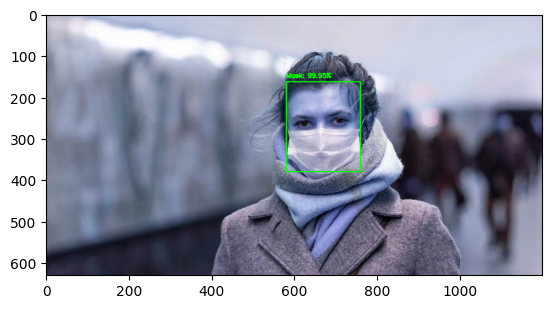

In [24]:
plt.imshow(image)

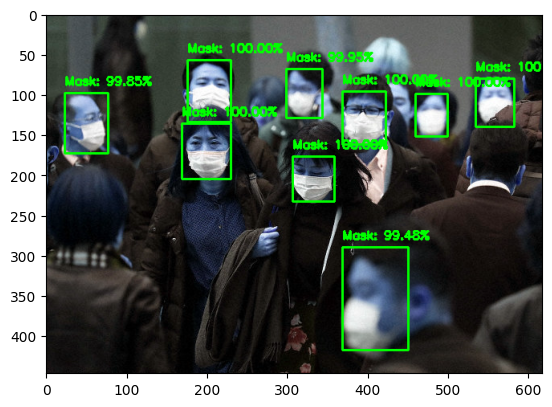

In [16]:
plt.imshow(image)